# Введение в статистику. Библиотека Scipy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import scipy


import random

from IPython.display import *

from scipy import stats

### Выборка и генеральная совокупность

**Генеральная совокупность** – это совокупность всех мысленно возможных объектов данного вида, над которыми проводятся наблюдения с целью получения конкретных значений определенной случайной величины.

**Выборкой** (выборочной совокупностью) называется совокупность случайно отобранных объектов из генеральной совокупности.

### 1. Описательная статистика

Допустим, у нас есть не случайная выборка данных, а вся **генеральная совокупность** заказов в зоне под номером 13 за всю историю работы платформы DC. Попробуем построить распредление времени доставки в этой зоне.

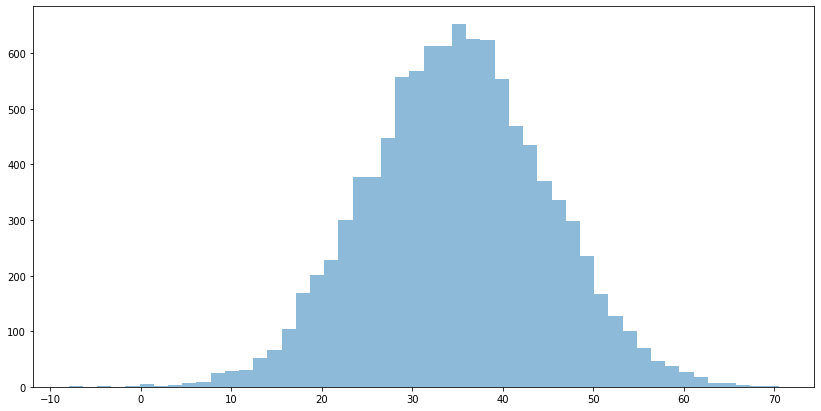

In [8]:
norm_rv1 = stats.norm(loc=35, scale = 10)
# scale - стандартное отклонение
# loc - среднее

#генерирует случайные значения из распредления norm_rv1
gen_pop = norm_rv1.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.5)
plt.show()

Также рассмотрим логнормальное распредление.

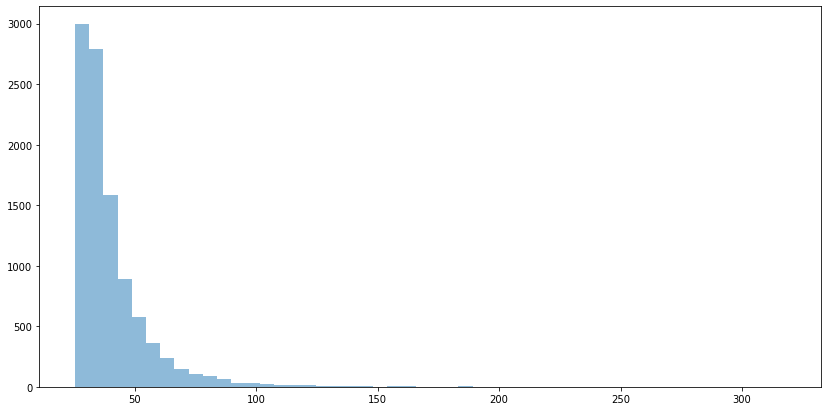

In [9]:
# В дейсвительности время доставки на платформе DC имеет как раз логнормальное распределение, 
# но мы будем рассматривать нормальное для понимания основных принципов.
ln_distrib = stats.lognorm(0.9, loc = 25, scale = 10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop_ln, 50, alpha=0.5)
plt.show()

<U>Основные меры концентрации:</U>
- медиана;
- мода;
- среднее арифметическое;
- перцентили.

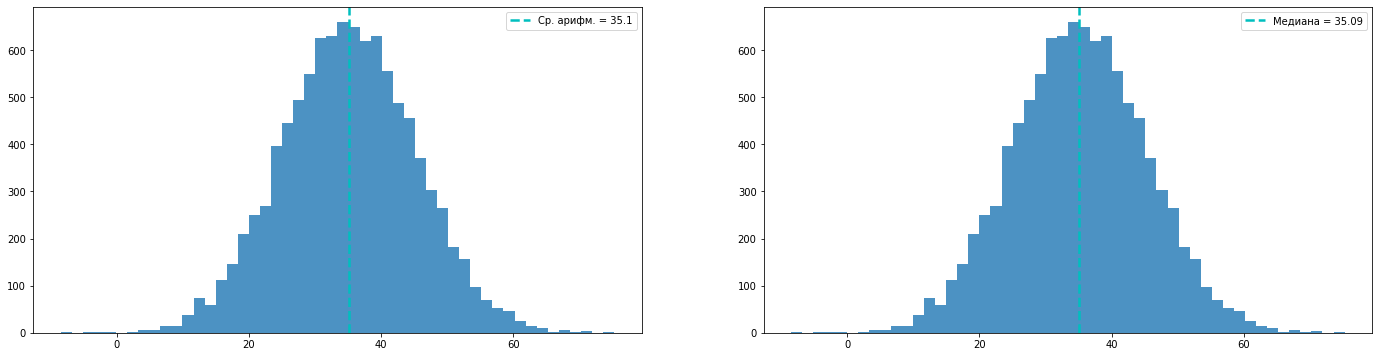

In [4]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(np.mean(gen_pop), label=('Ср. арифм. = '+str(round(np.mean(gen_pop), 2))), color='c', linestyle='dashed', linewidth=2.5)
ax1.legend(handles=[line1])

ax2 = plt.subplot(122)
plt.hist(gen_pop, 50, alpha=0.8)
line2 = plt.axvline(np.median(gen_pop), label=('Медиана = '+str(round(np.median(gen_pop), 2))), color='c', linestyle='dashed', linewidth=2.5)
ax2.legend(handles=[line2])

plt.show()

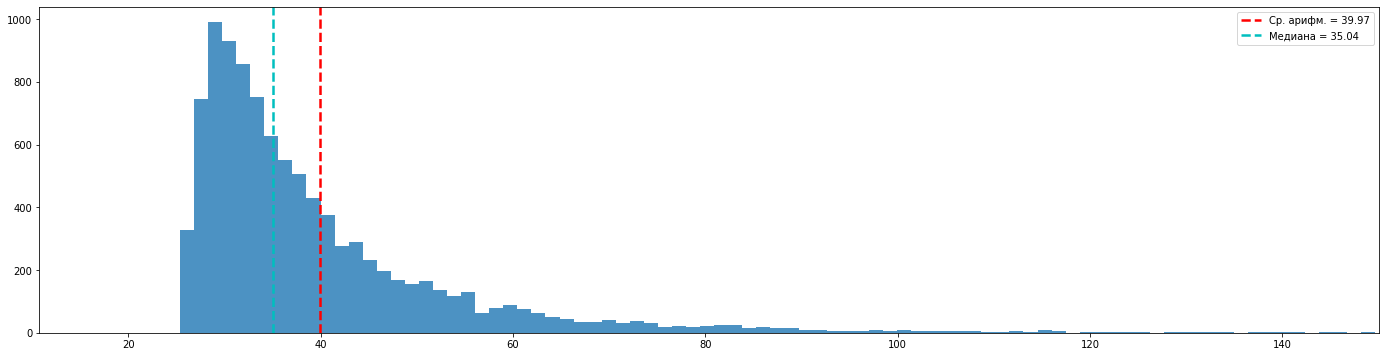

In [10]:
fig = plt.figure(figsize=(24, 6))

plt.hist(gen_pop_ln, 200, alpha=0.8)
line1 = plt.axvline(np.mean(gen_pop_ln), label=('Ср. арифм. = '+str(round(np.mean(gen_pop_ln), 2))), color='r', linestyle='dashed', linewidth=2.5)
line2 = plt.axvline(np.median(gen_pop_ln), label=('Медиана = '+str(round(np.median(gen_pop_ln), 2))), color='c', linestyle='dashed', linewidth=2.5)

plt.legend(handles=[line1,line2])
plt.xlim(right = 150)

plt.show()

**Медиана** — это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него.

**Мода** — значение во множестве наблюдений, которое встречается наиболее часто.

**Квантиль** — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем

Найдем 75 процентиль времени доставки для платформы DC. 

In [11]:
np.percentile(gen_pop, 75)
# stats.scoreatpercentile(gen_pop, 75)

41.53021364574485

Означает, что 75% доставок на плаформе не превышает время в 42 минуты.

<img width = '600px' src="images/lesson_8/percentile.png">

<U>Основные меры распределения:</U>
- среднеквадратическое отклонение;
- дисперсия.

*Стоит различать меры распределения отдельно для генеральной совокупности и для выборки.*

### Оценки генеральной совокупности

Для генеральной совокупности данных:

среднее  - $ \mu =  \frac{1} {N} \sum_{i=1}^N (x_i) $

дисперсия - $ \sigma^2 = { \frac{1} {N} \sum_{i=1}^N (x_i - \mu)^2}$

среднеквадратическое отклонение - $ \sigma = \sqrt{ \frac{1} {N} \sum_{i=1}^N (x_i - \mu)^2}$

In [12]:
mean_ = np.mean(gen_pop) #среднее
var_ = np.var(gen_pop)#дисперсия
print(var_)
std_ = np.std(gen_pop)#среднеквадратичное отклонение
print(std_)

97.71113438924222
9.884894252810305


Распределение рассмотренной выше генеральной совокупности, которое по форме напоминает колокол или остроконечную шляпу, называется **нормальным** или **гауссовским** и описывается формулой:

$ \Large pdf(x,\mu,\sigma) = \frac{1}{ \sigma\sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$

Откуда взялся такой "монстр" - https://www.youtube.com/watch?v=ebewBjZmZTw

**Правило 3 сигм**: 

Вероятность того, что случайная величина отклонится от своего математического ожидания на большую величину, чем утроенное среднее квадратичное отклонение, практически равна нулю. Применимо только для нормального распределения!

<img width = '400px' src="images/lesson_8/3sigma.png">

**PDF и CDF**

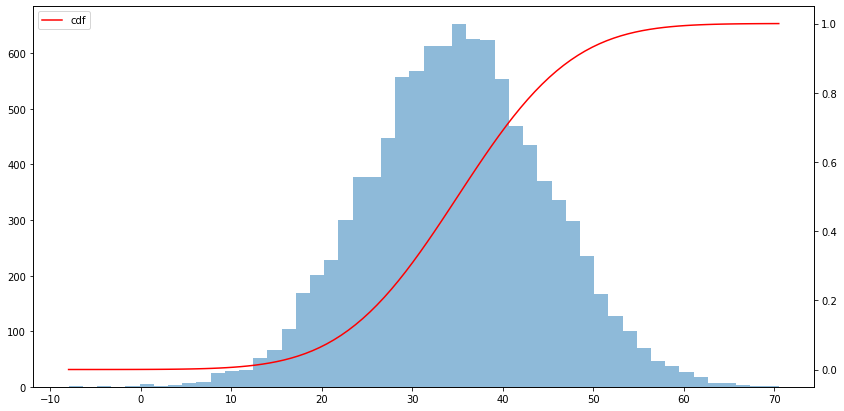

In [14]:
fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.5)

mu = 35
sigma = 10
x = np.linspace(gen_pop.min(), gen_pop.max(), 100)
y_cdf = stats.norm.cdf(x, mu, sigma)

plt.twinx()
plt.plot(x, y_cdf, label='cdf', color = 'r')

plt.legend()

plt.show()

Кумулятивная функция распределения дает интегральную картину распределения вероятности, задает вопрос: **«Какова вероятность того, что результат окажется меньше или равен такому-то?»**.

### Выборочные оценки

Зачастую у нас нет возможности работы с генеральной совокупностью, мы имеем дело только с выборкой, то есть мы не можем точно знать значения дисперсии и стандартного отклонения, поэтому данные показатели мы можем лишь оценить.

Среднее генеральной совокупности через **выборочное среднее**:

$ \overline{X} =  \frac{1} {n} \sum_{i=1}^n (x_i) $, здесь n - объем выборки.

Стандартное отклонение через **выборочное стандартное отклонение**:

$ S = \sqrt{ \frac{1} {n-1} \sum_{i=1}^n (x_i - \overline{X})^2}$.

Разброс значений в пределах выборки никогда не бывает столь большим, как во всей совокупности, и деление не на n, а на n – 1 компенсирует возникающее занижение оценки стандартного отклонения.


In [15]:
#выборка
zone_orders_sample = random.sample(list(gen_pop), 1000) 

In [16]:
sample_std = np.std(zone_orders_sample, ddof = 1)
# ddof задает делитель как (N - ddof)

Разные выборки из генеральной совокупности могут отличаться от самой генеральной совокупности, то есть при оценке генеральной совокупности через выборку мы можем ошибаться. Такая ошибка называется **стандартная ошибка**. Рассчитывается для любого показателя, чаще всего используется **стандартная ошибка среднего** (т.е. оценивает точность, с которой выборочное среднее оценивает среднее генеральной совокупности).

**Стандартная ошибка среднего** в математической статистике — величина, характеризующая стандартное отклонение выборочного среднего, рассчитанное по выборке размера n из генеральной совокупности. 

истинная стандартная ошибка - $ {\sigma }_{\bar {x}} ={\frac {\sigma }{\sqrt {N}}} $

оценка стандартной ошибки по выборке - $ {S }_{\bar {x}} ={\frac {S }{\sqrt {n}}} $

In [17]:
stats.sem(zone_orders_sample)
# sample_std/np.sqrt(len(zone_orders_sample))

0.3127799545539517

Чем больше выборка, тем точнее оценка среднего и тем меньше
его стандартная ошибка. Чем больше изменчивость исходной
совокупности, тем больше изменчивость выборочных средних,
поэтому стандартная ошибка среднего возрастает с увеличением
стандартного отклонения совокупности.

**В отличие от стандартного
отклонения стандартная ошибка среднего ничего не
говорит о разбросе данных, — она лишь показывает точность
выборочной оценки среднего.**

### Центральная предельная теорема

- Выборочные средние имеют приближенно нормальное распределение независимо от распределения исходной совокупности, из которой были извлечены выборки.
- Среднее значение всех возможных выборочных средних равно среднему исходной совокупности.
- Стандартное отклонение всех возможных средних по выборкам данного объема, называемое стандартной ошибкой среднего, зависит как от стандартного отклонения совокупности, так и от объема выборки. 

При этом:
- выборки должны извлекаться случайно
- размер выборки не должен превышать 10% размера всей генеральной совокупности
- размер выборки должен быть достаточно большим - принимают, что большая выборка - более 30 наблюдений

**ЦПТ позволяет делать предположения о вашем исходном распределении.**

In [18]:
from numpy.random import seed
from numpy.random import randint

seed(1010)

weights = randint(60, 90, 5000)
print(weights)
print('Средний вес - {} кг'.format(np.mean(weights)))

[64 68 70 ... 66 79 86]
Средний вес - 74.6722 кг


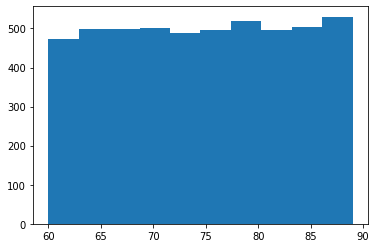

In [19]:
#Посмотрим на распредление нашей генеральной совокупности
plt.hist(weights, bins = 10)
plt.show()

Сформируем выборку и посчитаем среднее:

In [35]:
n = 20
s = np.random.choice(weights,n)
print(s)
print(np.mean(s))

[66 64 66 74 70 65 78 71 69 79 84 73 83 78 66 74 83 64 70 72]
72.45


Еще одну выборку:

In [36]:
n = 20
s = np.random.choice(weights,n)
print(s)
print(np.mean(s))

[67 74 60 86 79 78 89 72 76 86 70 69 71 87 62 78 84 86 75 82]
76.55


**Так какое же истинное среднее генеральной совокупности?**

Теперь возьмем уже 100 выборок и для них посчитаем средние.

In [37]:
n = 30
means = [np.mean(np.random.choice(weights, n )) for _i in range(100)]
plt.hist(means, bins = 20)
plt.show()
print('Среднее - {} кг'.format(np.mean(means))

SyntaxError: unexpected EOF while parsing (<ipython-input-37-1aeeded4f2e6>, line 5)

Средние всех выборок концентрируются вокруг истинного среднего генеральной совокупности, а сама форма распределения становится нормальным с увеличением числа выборок.

В соответсвие с ЦПТ среднее выборочных средних равно среднему исходной совокупности, а стандартное отклонение - стандартная ошибка среднего.

**Зачем это нужно?**

Так как мы знаем, как выглядит распредление средних для исходной совокупности, знаем свойства этого распредления, при работе с выборкой, мы можем сравнить среднее выборки с распредлением средних исходной совокупности, иначе - проверить гипотезу о том, с какой вероятностью выборка принадлежит исходной совокупности.

### 2. Проверка гипотез

Пайплайн оценки статистической значимости:
- Формулирование нулевой гипотезы (H0);
- Оценка вероятности получить наблюдаемые (или более сильные) различия при условии справедливости нулевой гипотезы;
- Принятие либо отвержение нулевой гипотезы.

### 2.1 Однофакторный дисперсионный анализ

**Задача**. Курьерам выдали электроскутеры, велосипеды, электровелосипеды и самокаты. 
Понять, отличается ли как-то скорость доставки заказов клиентам в этих группах/все ли выборки взяты из одного (схожего) распредления /какова вероятность получить такие различия в группах, которые будут найдены извлекая случайные выборки из генеральной совокупности?

В теории, если курьерам выдали электроскутеры, то среднее в распредлении будет смещено влево - то есть среднее время доставки заказов в теории должно уменьшиться.
Представим другую ситуацию - курьерам сложно овладевать новой техникой, они тратят много времени на то, чтобы пристегнуть/запустить ее, то есть среднее время доставки не поменялось, данные по среднему времени доставки заказов пришли из **одного распределения**. 

Представим, Извлечем из нашей совокупности 4 случайные подгруппы по 10 заказов в каждой.

In [38]:
np.random.seed(3106)

sample_groups = []

for i in range(4):
    sample_groups.append(np.random.choice(gen_pop, size = 10).astype(int))
sample_groups = np.array(sample_groups)
sample_groups

array([[46, 32, 31, 52, 30, 29, 40, 47, 35, 37],
       [23, 46, 26, 28, 32, 31, 18, 29,  8, 16],
       [24, 31, 39, 36, 26, 47, 55, 35, 38, 42],
       [23, 37, 47, 10, 45, 43, 27, 37, 35, 45]])

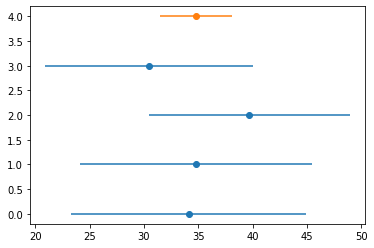

In [40]:
#Средние каждой выборки, их стандартное отклонение, а также стандартное отклонение средних и среднее средних
x = np.mean(sample_groups,axis = 1)
y = np.arange(sample_groups.shape[0])
e = np.std(sample_groups,axis = 1)

plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')

plt.errorbar( np.mean(x), y.shape[0] ,xerr =  np.std(x), linestyle='None', marker='o')

plt.show()

Также, дисперсия правильно характеризует разброс только в том случае, если совокупность имеет нормальное распределение. Анализ применим **только** для нормально распределенных совокупностей.

Проверим следующие гипотезы:

H0 - выборки взяты из одной совокупности (средние всех выборок равны) - обычно **пессиместичная гипотеза**/пассивная

H1 - выборки взяты из разных совокупностей (хотя бы пара средних различается между собой)

Просто дисперсонный анализ проверяет что чем больше разброс средних и чем меньше разброс значений внутри групп, тем меньше вероятность
того, что наши группы — это случайные выборки из одной совокупности.

**F** = $ \Large  \frac{Sмеж.^2} {Sвнутр.^2} = \frac{\frac{SSB} {m-1}} {\frac{SSW} {N - m}} $

$ SST =  SSB + SSW $

$ SST - \text{общая изменчивость}, $ 
$ SSB - \text{межгрупповая изменчивость}, $ 
$ SSW - \text{внутригрупповая изменчивость}$ 

$m - \text{кол-во групп}, $
$N - \text{число наблюдений} $

**F** = $ \Large \frac{\text{СИГНАЛ}} {\text{ШУМ}}$

Произведем рассчет:

In [39]:
sample_groups

array([[46, 32, 31, 52, 30, 29, 40, 47, 35, 37],
       [23, 46, 26, 28, 32, 31, 18, 29,  8, 16],
       [24, 31, 39, 36, 26, 47, 55, 35, 38, 42],
       [23, 37, 47, 10, 45, 43, 27, 37, 35, 45]])

In [40]:
# 1 -  Рассчитаем среднее по всем наблюдениям:
X_mean = sample_groups.mean()
X_mean

33.95

In [41]:
# 2 - SST
SST = np.sum((sample_groups- X_mean)**2)
SST

4545.900000000001

In [43]:
# 3 - SSW
group_means = sample_groups.mean(axis = 1)

SSW  = np.sum((sample_groups  - group_means.reshape(4,1))**2)
SSW

3588.0

In [44]:
# 4 - SSB
group_lengths = [x.shape[0] for x in sample_groups]

SSB  = np.sum((group_means - X_mean)**2 * group_lengths)
SSB

957.8999999999996

In [45]:
# 5 F
num_of_groups = sample_groups.shape[0]

F = (SSB/(num_of_groups-1))/(SSW/(np.sum(group_lengths) - num_of_groups))
F

3.203678929765885

In [46]:
(np.sum(group_lengths) - num_of_groups)

36

***

In [47]:
F, p = stats.f_oneway(sample_groups[0],sample_groups[1],sample_groups[2],sample_groups[3])

In [48]:
F

3.2036789297658856

**p** - вероятность ошибочно отвергнуть верную нулевую гипотезу, то есть найти различия там, где их нет. 

Это вероятность получить такие или более выраженные различия при условии, что между группами никаких различий на самом деле нет. Иными словами, это вероятность получить такие или еще более сильные различия между нашими группами, при условии, что, на самом деле, все передвигаются с одинаковой скоростью.

In [53]:
p

0.30024009652761247

**Вывод**: Мы не можем отвергнуть гипотезу H0, p >0.05.

Сверимся - https://gallery.shinyapps.io/dist_calc/.

Посмотрим, что такое F, будем из нашей выборки извлекать выборки и считать F.

In [49]:
def calculate_random_sample_group(sz = 10):
    sample_groups = []
    for i in range(4):
        sample_groups.append(np.random.choice(gen_pop, size = sz))
    F, p = stats.f_oneway(sample_groups[0],sample_groups[1],sample_groups[2],sample_groups[3])    
    return sample_groups, F

Fs = []
sgs = []
for i in range(30000):
    sg,F = calculate_random_sample_group()
    Fs.append(F)
    sgs.append(sg)

Распределение приняло опредленную форму, такое распредление называется распредление Фишера.

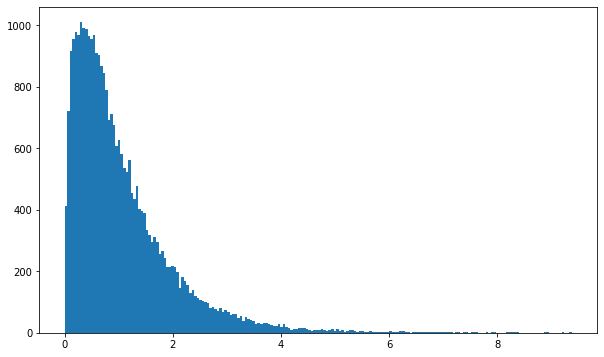

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(Fs,bins = 200)
plt.show()

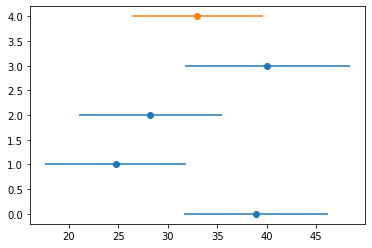

In [51]:
# Рассморим группу семплов, которое приняло максимальное значение критерия F
sample_groups_ = np.array(sgs[Fs.index(max(Fs))])


x = np.mean(sample_groups_,axis = 1)
y = np.arange(sample_groups_.shape[0])
e = np.std(sample_groups_,axis = 1)

plt.errorbar(x, y, xerr = e, linestyle='None', marker='o')

plt.errorbar( np.mean(x), y.shape[0] ,xerr =  np.std(x), linestyle='None', marker='o')

plt.show()

In [52]:
F, p = stats.f_oneway(sample_groups_[0],sample_groups_[1],sample_groups_[2],sample_groups_[3])
F

9.377110153540174

In [53]:
p

0.00010237258214010981

Совсем не похоже, что выборки взяты из одного распредлеения, хотя это на самом деле так. Выбирая F-критическое, мы сами задаем , с какой вероятностью мы допускаем ошибочное отвержение нулевой гипотезы.

### Классификация критериев

1. **Одновыборочные** - проверяют гипотезы относительно ОДНОЙ выборки.
2. **Двувыборочные со связанными выборками** - элементы выборок являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов. 
3. **Двувыборочные с несвязанными выборками** - элементы выборок НЕ являются парными результатами повторных измерений, выполненных в одном и том же множестве элементов. 

### 2.2 Критерий Стьюдента

### Критерий Стьюдента для несвязанных выборок

Частный случай дисперсионного анализа - применение критерия Стьюдента, позволяет проверять значимость различий двух групп.

**Задача**. Курьерам выдали электроскутеры, велосипеды, электровелосипеды и самокаты. 
Понять, отличается ли как-то скорость доставки заказов клиентам на электросамокатах от скорости доставки на велосипедах.

H0: скорость доставки заказов на велосипеде и на скутере равны

H1: скорость доставки заказов на велосипеде и на скутере различны

In [54]:
# Построим две новые теоретические генеральные совокупности:
# курьеры, которые доставляли на велосипедах:
norm_vel = stats.norm(loc=37, scale = 10)
# курьеры, которые доставляли на электросамокатах:
norm_sam = stats.norm(loc=32, scale = 13)

In [55]:
norm_vel_sample = norm_vel.rvs(size=50)
norm_sam_sample = norm_sam.rvs(size=50)

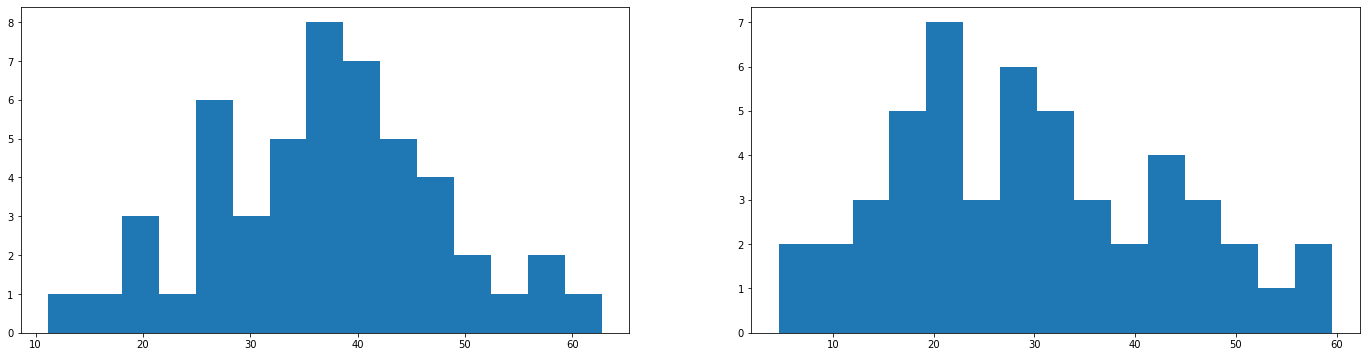

In [56]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(norm_vel_sample, 15)

ax2 = plt.subplot(122)
plt.hist(norm_sam_sample, 15)

plt.show()

t-критерий Стьюдента:

**t** = $ \Large \frac{\text{Разность выборочных средних}} {\text{Стандартная ошибка разности выборочных средних} } = \frac{\overline{X_1}-\overline{X_2}} {{S_{\overline{X_1} - \overline{X_2}}}  } = \frac{\overline{X_1}-\overline{X_2}} { \sqrt{ S_{\overline{X_1}}^2 + S_{\overline{X_2}}^2 } } $

**t** = $ \Large \frac{\text{СИГНАЛ}} {\text{ШУМ}}$

Для двух случайных выборок извлеченных из **одной** нормально распределенной совокупности это отношение будет близко к 0. Чем меньше t, тем больше вероятность нулевой гипотезы. Чем больше t, тем больше оснований отвергнуть нулевую гипотезу и считать, что различия статистически значимы. 

In [59]:
t_stat = stats.ttest_ind(norm_sam_sample,norm_vel_sample)
t_stat

Ttest_indResult(statistic=-2.865408977088814, pvalue=0.005096578305859042)

Нулевая гипотеза отвергается при 5-% уровне значимости, действительно, выборки взяты из разных распределений.

Еще раз посмотрим, что будет, если много раз делать выборки из одной и той же совокупности и считать статистики.

In [57]:
def calculate_random_sample_group(sz = 50):
    sample_groups = []
    for i in range(2):
        sample_groups.append(np.random.choice(gen_pop, size = sz))
    t, p = stats.ttest_ind(sample_groups[0], sample_groups[1] )    
    return sample_groups, t

ts = []
sgs = []
for i in range(10000):
    sg,t = calculate_random_sample_group()
    ts.append(t)
    sgs.append(sg)

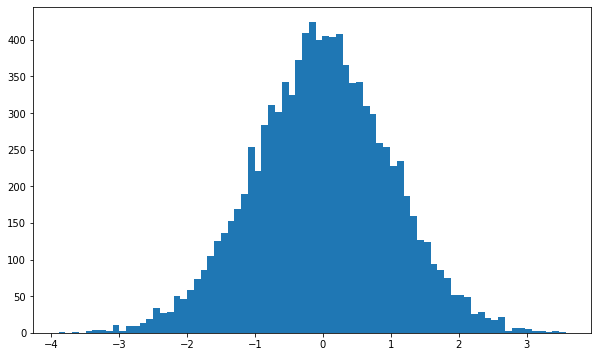

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(ts,bins = 75)
plt.show()

Распределение Стьюдента, имеет более тяжелые хвосты, чем нормальное.

Теперь чуть подробнее рассмотрим переход, откуда это взялось:

$ {S_{\overline{X_1} - \overline{X_2}}}  = \sqrt{ S_{\overline{X_1}}^2 + S_{\overline{X_2}}^2 } $

$ {S^2_{\overline{X_1} - \overline{X_2}}}  =  S_{\overline{X_1}}^2 + S_{\overline{X_2}}^2  $


Почему квадрат стандартной ошибки разности средних равен сумме квадратов стандартной ошибки средних?

Стандартная ошибка среднего для первой выборки равна  0.09113869887934303
Квадрат ошибки среднего для первой выборки равен  0.008306262433419562
Стандартная ошибка среднего для второй выборки равна  0.06186037226525906
Квадрат ошибки среднего для второй выборки равен  0.0038267056567964325


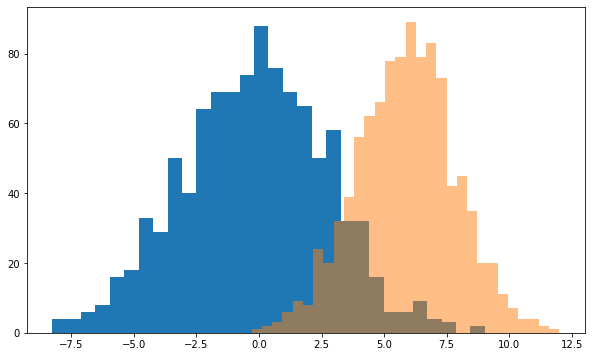

In [60]:
#сформируем генеральные совокупности и выборки из них 
test_rv1 = stats.norm(loc=0, scale = 3)
test_rv2 = stats.norm(loc=6, scale = 2)

test_gen_pop = test_rv1.rvs(size=10000)
test_gen_pop2 = test_rv2.rvs(size=10000)

n = 1000
test_sample = np.random.choice(test_gen_pop,n)
test_sample2 = np.random.choice(test_gen_pop2,n)

print('Стандартная ошибка среднего для первой выборки равна  {}'.format(stats.sem(test_sample)))
print('Квадрат ошибки среднего для первой выборки равен  {}'.format((stats.sem(test_sample))**2))
print('Стандартная ошибка среднего для второй выборки равна  {}'.format(stats.sem(test_sample2)))
print('Квадрат ошибки среднего для второй выборки равен  {}'.format((stats.sem(test_sample2))**2))

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(test_sample,bins = 30)
plt.hist(test_sample2,bins = 30, alpha = 0.5)

plt.show()

Стандартная ошибка среднего для разницы выборок равна  0.11202801142928748
Квадрат ошибки среднего для разницы выборок равен  0.012550275344800566


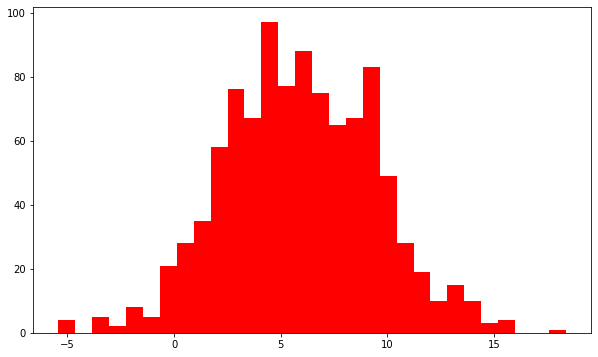

In [96]:
#Будем извлекать случайные наблюдения из 2 выборок, считать их разность 
n_2 = 1000
diff_ = np.random.choice(test_sample2,n_2) - np.random.choice(test_sample,n_2)
print('Стандартная ошибка среднего для разницы выборок равна  {}'.format(stats.sem(diff_)))
print('Квадрат ошибки среднего для разницы выборок равен  {}'.format((stats.sem(diff_))**2))

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(diff_,bins = 30, color = 'red')

plt.show()

**Мощность критерия**

<img width = '500' src="images/lesson_8/errors.png">

### Критерий Стьюдента для связанных выборок

**Задача**. А что, если хотим сравнить, как изменилась скорость курьеров у одних и тех же курьеров? Тогда имеем дело с парным критерием Стьюдента или двувыборочным критерием Стьюдента для связанных выборок.

<img width = '400px' src="images/lesson_8/pp.png">

t = $\Large \frac{\overline{d}} {S_{\overline{d}}} $, где $\overline{d} $ - среднее изменений, $S_{\overline{d}}$ - стандартная ошибка.

Если обычный критерий Стьюдента требует нормального распределения самих данных, то парный критерий Стьюдента требует нормального распределения их изменений.

In [61]:
df_ = pd.DataFrame()
df_['courier_id'] = np.array([1, 2, 3, 4, 5, 6])
df_['couriers_without_bike_time'] = np.array([39, 49, 47, 39, 28, 26])
df_['couriers_with_bike_time'] = np.array([29, 53, 43, 39, 33, 30])
df_.head()

,courier_id,couriers_without_bike_time,couriers_with_bike_time
0,1,39,29
1,2,49,53
2,3,47,43
3,4,39,39
4,5,28,33


H0: среднее время доставки курьеров на велосипеде и без велосипеда равны

H1: среднее время доставки курьеров на велосипеде не равны

In [62]:
#Корректно только в случае, если два распредления - одни и те же курьеры
stats.ttest_rel(df_.couriers_without_bike_time, df_.couriers_with_bike_time)

Ttest_relResult(statistic=0.06943774745378857, pvalue=0.9473327114146763)

### Множественные сравнения

Если исследуемых групп больше двух, то следует воспользоваться дисперсионным анализом. Однако дисперсионный анализ позволяет проверить лишь гипотезу о равенстве всех средних.
Но если гипотеза не подтверждается, нельзя узнать какая именно группа отличается от других.

Эффект множественных сравнений состоит в том, что при многократном применении критерия вероятность ошибочно найти различия там, где их нет возрастает и составляет P = $ 1 - (1 - \alpha) ^ k $, k - число сравнений, $ \alpha $ - установленный уровень значимости.

**Поправка Бонферонни** заключается в том, что достигаемые уровни значимости гипотез сравниваются с уровнем значимости $ \Large \frac{\alpha} {k}$.

Поправка Бонферонни - один из самых консервативных методов. Также часто используют метод Холма, метод Бенджамини-Хохберга, которые не столь консервативны. 

### Одновыборочный критерий Стьюдента

$ \Large t = \frac{\overline{X} - \mu} {\frac{S}{\sqrt{n}}} $

Сигнал/Шум

Задача: оценить эффективность доставки курьерами заказов.

H0 - среднее время доставки на велосипеде равно 37 минутам

H1 - среднее время доставки на велосипеде не равно 37 минутам



In [43]:
stats.ttest_1samp(a = norm_vel_sample , popmean = 37)

Ttest_1sampResult(statistic=-1.4317277912161106, pvalue=0.1585698154586884)

### 2.3 Проверка распределений на нормальность

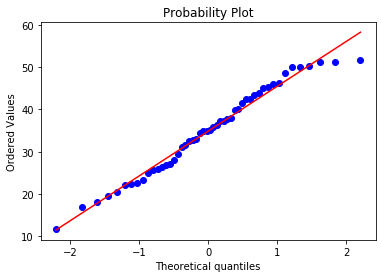

In [44]:
#c помощью Q-Q графика
stats.probplot(norm_vel_sample, dist = "norm", plot = plt)
plt.show()

Как строится:

1. берём 0.01-квантиль теоретического (с которым сравниваем) распределения, например нормального -- это x1(≈-2.33 для нормального). 
2. берём 0.01-квантиль нашей выборки -- это y1. Рисуем на графике точку (x1,y1). 
3. берём 0.02-квантиль теоретического распределения -- это x2, и 0.02-квантиль выборки -- это y2. Опять рисуем на графике точку (x2,y2).


И так далее. Естественно, рисовать точки можно с любым шагом, не только 0.01.
Распределения одинаковые, если все эти точки попадут на прямую y=x. Если на другую прямую, то это значит, что распределения одинаковы с точностью до нормализации.

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [1]:
#c помощью критерия Шапиро- Уилка
stats.shapiro(norm_vel_sample)

NameError: name 'stats' is not defined

### Анализ качественных признаков

**Качественные признаки** - признаки не связаны между собой никакими арифметическими соотношениями, упорядочить их также нельзя.
Единственный способ описания качественных признаков состоит в том, чтобы подсчитать число объектов, имеющих одно и то же значение. Кроме того, можно подсчитать, какая доля от
общего числа объектов приходится на то или иное значение.

### 2.4 Критерий для доли

### Z-критерий для несвязанных выборок

Для проверки гипотезы о равентсве долей используется критерий аналогично критерию Стьюдента t.

**z** = $ \Large \frac{\text{Разность выборочных долей}} {\text{Стандартная ошибка разности выборочных долей}}  = \frac{\hat{p_1}-\hat{p_2}} {{S_{\hat{p_1} - \hat{p_2}}}}  = \frac{\hat{p_1}-\hat{p_2}} { \sqrt{ S_{\hat{p_1}}^2 +  S_{\hat{p_2}}^2 } } = \frac{\hat{p_1}-\hat{p_2}} { \sqrt{ \frac{\hat{p_1}(1-\hat{p_1})} {n_1} +  \frac{\hat{p_2}(1-\hat{p_2})} {n_2} } } $


**z**  $ \Large = \frac{|\hat{p_1}-\hat{p_2}| - \frac{1} {2} (\frac{1} {n_1} + \frac{1} {n_2} ) } { \sqrt{ \frac{\hat{p_1}(1-\hat{p_1})} {n_1} +  \frac{\hat{p_2}(1-\hat{p_2})} {n_2} } }$

Корректно использовать в том случае, когда n*p и n*(1 − p) превосходят 5 для всех групп.

**Задача.** DC работает над новым баннером, который хочет разместить на одной из своих рекламных площадок. Было придумано 2 варианта баннеров (A и B). На первый баннер за первые сутки кликнуло 100 человек из 300 посетителей, на второй баннер 400 человек из 800 посетителей. Решить,какой баннер оставлять.

H0: доля кликов по двум баннерам одинакова

H1: доля кликов по баннеру B больше, чем по баннеру А ('smaller')

In [4]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([100, 300])
nobs = np.array([300, 800])
proportions_ztest(count, nobs, alternative='smaller')

(-1.279415789297898, 0.10037533831983553)

В итоге, исходная гипотеза подтвердилась.

Нулевое распредление для данной статистики будет нормальное распределение с параметрами (0,1).

### Z-критерий для связанных выборок

<img width = '400px' src="images/lesson_8/two_prop.png">

**z** = $\Large \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$

**Задача.** DC решило поменять один из существующих баннеров на площадке VK. Изменило цвет баннера с зеленого на светло-зеленый. Проверить гипотезу о том, что на новый баннер стали кликать чаще.

In [48]:
#Клики на старый баннер
banner_clicks_dark_green = [0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
banner_clicks_light_green = [1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,1]

In [49]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = zip(sample1, sample2)
    n = len(sample1)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [50]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    
    if alternative == 'two-sided':
        return z_stat,2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return z_stat,scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return z_stat, 1 - scipy.stats.norm.cdf(z_stat)

In [51]:
import scipy
proportions_diff_z_test(proportions_diff_z_stat_rel(banner_clicks_dark_green,banner_clicks_light_green),'less' )

(1.0215078369104984, 0.8464930509830875)

### Одновыборочный критерий для доли

**Задача**. Также могли решать задачу одновыборочного критерия для доли: хотим проверить гипотезу о том, что на баннер A кликают в 50% случаев. 

**z** = $ \Large \frac{\hat{p}-p_0 } {\sqrt{ \frac{p_0 * (1 - p_0)} {n} }} $

In [65]:
count = np.array(100)
nobs = np.array(300)
value = 0.5
proportions_ztest(count, nobs, value = value)

NameError: name 'proportions_ztest' is not defined

Нулевая гипотеза отвергается.

### 2.5 Критерий Хи-квадрат

Применим, когда число значений признака и число выборок может оказаться большим двух.

Рассмотрим задачу про размещение баннеров, но теперь будем рассматривать уже не доли, а числа.

In [52]:
from scipy.stats import chi2_contingency

In [66]:
banner_data = pd.DataFrame()
banner_data['clicked'] = [100,400,500]
banner_data['non_clicked'] = [200, 400,600]
banner_data.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data['Total'] = banner_data['clicked'] + banner_data['non_clicked']
#Аналогичную таблицу с агрегациями можно получить с помощью функции pd.crosstab, установив парамет margins = True
banner_data

,clicked,non_clicked,Total
Баннер_A,100,200,300
Баннер_B,400,400,800
Итого,500,600,1100


При работе с критерием хи-квадрат встречается понятие, как таблица ожидаемых значений.

Примем нулевую гипотезу H0, что кликабельность по баннерам A и B одинакова, тогда:

In [67]:
clicked_total = 500/1100
non_clicked_total = 600/1100

Если баннера не влияют на кликабельность, то есть поведение клиентов при посещении сайта должно быть схожим с общим.

In [68]:
banner_A_clicked = clicked_total* 300
banner_B_clicked = clicked_total* 800

banner_A_non_clicked = non_clicked_total* 300
banner_B_non_clicked = non_clicked_total* 800

In [69]:
banner_data_E = pd.DataFrame()
banner_data_E['clicked'] = [banner_A_clicked,banner_B_clicked,500]
banner_data_E['non_clicked'] = [banner_A_non_clicked, banner_B_non_clicked,600]
banner_data_E.index = ['Баннер_A', 'Баннер_B','Итого']
banner_data_E['Total'] = banner_data_E['clicked'] + banner_data_E['non_clicked']
banner_data_E

,clicked,non_clicked,Total
Баннер_A,136.363636,163.636364,300.0
Баннер_B,363.636364,436.363636,800.0
Итого,500.000000,600.000000,1100.0


Реальная картина отличается от той, что была бы, если бы баннеры не отличались по своей кликабельности.

$ \Large \chi^2  = \sum {   \frac{(O - E)^2} {E}  } $, O  - наблюдаемое значение, E - ожидаемое значение.

$ \Large \chi^2  = \sum {   \frac{|O - E| - \frac{1} {2}} {E}  } $ (с поправкой Йеитса - только для таблиц 2х2)

In [57]:
chi2, p, dof, ex = chi2_contingency(banner_data.iloc[:2,:2])

In [58]:
chi2,p,dof,ex

(23.776843750000012,
 1.0817608500977008e-06,
 1,
 array([[136.36363636, 163.63636364],
        [363.63636364, 436.36363636]]))

Нулевая гипотеза отвергается.

Аналогичное применение критерия мы можем использовать для любого количества объектов и наблюдений. 

С помощью критерия хи-квадрат мы также можем проверять любое из распредлений на нормальность или схожесть с любым другим теоретическим распредлением, самостоятельно задавая ожидаемые значения.

Для таблиц сопряженности размером 2×2 критерий χ2 применим только в случае, когда все ожидаемые числа больше 5. 
В этом случае критерии χ2 применим, если все ожидаемые числа не меньше 1 и доля клеток с ожидаемыми числами меньше
5 не превышает 20%. При невыполнении этих условии критерии χ2 может дать ложные результаты. 

### 2.6 Точный критерий Фишера

Используется для таблиц сопряженности 2х2, когда критерий χ2 неприменим - используется для очень малых выборок.

<img width = '500px' src="images/lesson_8/fisher_crit.png">

Просто перебор всех сочетаний.

In [70]:
banner_data = pd.DataFrame()
banner_data['clicked'] = [8,1]
banner_data['non_clicked'] = [2, 5]
banner_data.index = ['Баннер_A', 'Баннер_B']
banner_data

,clicked,non_clicked
Баннер_A,8,2
Баннер_B,1,5


In [71]:
stats.fisher_exact(banner_data)

(20.0, 0.03496503496503495)

Достоинством метода является соответствие полученного критерия точному значению уровня значимости p.